# Detect object and draw outlines at outdoor & indoor scenes.
PSPNet (Pyramid Scene Parsing Network) is a state-of-art segmentation network. It will not only detect object but also detect the outline of object, partition the image into several segments. 


# Prediction Examples:
[]() | []()
- | -
![](https://i.imgur.com/qKVoTmu.png?1) | ![](https://i.imgur.com/nOUfmsu.jpg)
![](https://i.imgur.com/YoUpgYb.png?1) | ![](https://i.imgur.com/M6ZA8SL.jpg)

## How Good Is This Model?
This model reaches the state-of-art performance, and came first in ImageNet scene parsing challenge 2016, PASCAL VOC 2012 benchmark and Cityscapes benchmark. In this tensorflow version, we achieve following accuracy:

Dataset | Model | mIoU (Mean Intersection over Union)
-- | -- | -- |
cityscapes | PSPNet101 | **77.23**
ADE20k | PSPNet50 | **40.67**

## Misc
This model trained on [cityscapes](https://www.cityscapes-dataset.com/) and [ade20k](http://sceneparsing.csail.mit.edu/) dataset.

# Tutorial

## Download and Unzip Model Files from ModelDepot.io

In [ ]:
# Shell commands to download and unzip the models
!wget https://modeldepot.io/assets/uploads/models/models/8a738312-b8dd-4c8e-8db7-1d6f6a0ff9f8_model.zip -O PSPNet_model.zip
!unzip PSPNet_model.zip

## Download Model Code From Github

In [ ]:
# Grab the source model code from Github
!git clone https://github.com/hellochick/PSPNet-tensorflow.git
# Move up im2txt modules to our current directory
!mv model PSPNet-tensorflow

In [ ]:
%cd PSPNet-tensorflow

## Install Dependencies
Feel free to skip if you already have these dependencies installed

In [ ]:
# Execute pip as a shell command
!pip install tensorflow scipy matplotlib 

## Import all necessary modules to script

In [ ]:
import tensorflow as tf
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from model import PSPNet101, PSPNet50
from tools import *

## Set up paths for Images and Weights
### TODO: Change these values if you're downloading the model files somewhere else.

In [ ]:
# TODO: Change these values to where your model files are
ADE20k_param = {'crop_size': [473, 473],
                'num_classes': 150, 
                'model': PSPNet50,
                'weights_path': './model/pspnet50-ade20k/model.ckpt-0'}
cityscapes_param = {'crop_size': [720, 720],
                    'num_classes': 19,
                    'model': PSPNet101,
                    'weights_path': './model/pspnet101-cityscapes/model.ckpt-0'}

IMAGE_MEAN = np.array((103.939, 116.779, 123.68), dtype=np.float32)
image_path = './input/test1.png'

# TODO: If you want to inference on indoor data, change this value to `ADE20k_param`
param = cityscapes_param 

## Preprocess Image & Create Network

In [ ]:
# pre-proecess image
img_np, filename = load_img(image_path)
img_shape = tf.shape(img_np)
h, w = (tf.maximum(param['crop_size'][0], img_shape[0]), tf.maximum(param['crop_size'][1], img_shape[1]))
img = preprocess(img_np, h, w)

In [ ]:
# Create network.
PSPNet = param['model']
net = PSPNet({'data': img}, is_training=False, num_classes=param['num_classes'])

## Predict segmentation image!

In [ ]:
raw_output = net.layers['conv6']

# Predictions.
raw_output_up = tf.image.resize_bilinear(raw_output, size=[h, w], align_corners=True)
raw_output_up = tf.image.crop_to_bounding_box(raw_output_up, 0, 0, img_shape[0], img_shape[1])
raw_output_up = tf.argmax(raw_output_up, dimension=3)
pred = decode_labels(raw_output_up, img_shape, param['num_classes'])

# Init tf Session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
init = tf.global_variables_initializer()

sess.run(init)

ckpt_path = param['weights_path']
loader = tf.train.Saver(var_list=tf.global_variables())
loader.restore(sess, ckpt_path)
print("Restored model parameters from {}".format(ckpt_path))
    
# Run and get result image
preds = sess.run(pred)

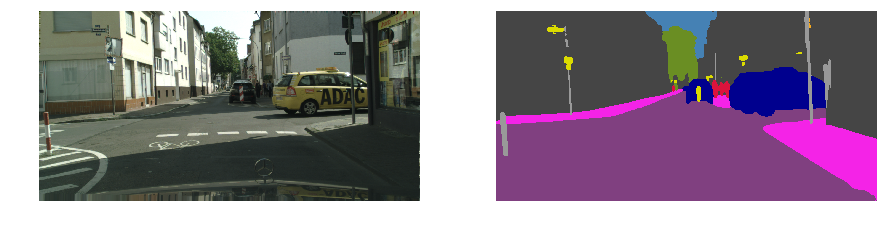

In [21]:
plt.figure(1, [15, 30])
plt.subplot(121)
plt.imshow(img_np)
plt.axis('off')
plt.subplot(122)
plt.imshow(preds[0]/255.0)
plt.axis('off')
plt.show()

# References

## PSPNet

*"Pyramid Scene Parsing Network"*

*Hengshuang Zhao, Jianping Shi, Xiaojuan Qi, Xiaogang Wang, Jiaya Jia*

*Proceedings of IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2018*

*Full text available at: https://arxiv.org/abs/1612.01105*

## Code
*https://github.com/hszhao/PSPNet*

